# Generate Dummy Data for Plots

In [244]:
import pandas as pd
import numpy as np

# | numerical index
# numerical columns
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
# categorical column
df['CAT1'] = np.random.choice(['C1','C2','C3'], size=len(df))
df['CAT2'] = np.random.choice(['C1','C2','C3'], size=len(df))
# df['CAT'] = pd.util.testing.rands_array(10, len(df))


# | datetime index
df_time = df.copy()
nr_days = len(df)
dates = pd.date_range(start='2018-04-24', freq='D', periods=nr_days)
df_time = df_time.set_index(dates)


df_time.head()

,A,B,C,D,CAT1,CAT2
2018-04-24,1.377074,-0.781020,-0.411752,1.096752,C1,C1
2018-04-25,-0.121970,-2.253951,-1.664661,-0.936286,C2,C2
2018-04-26,-0.305256,-0.321314,2.355736,-0.382828,C2,C3
2018-04-27,-2.082672,-0.075751,-1.190648,0.049541,C3,C1
2018-04-28,-1.146615,-0.512564,-0.936509,0.842943,C2,C3


# Line Plots

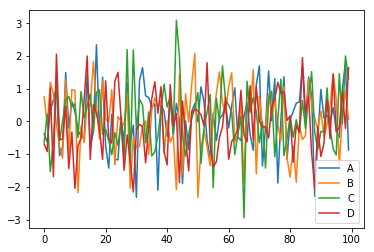

In [29]:
df.plot() # ignores categorical columns automatically

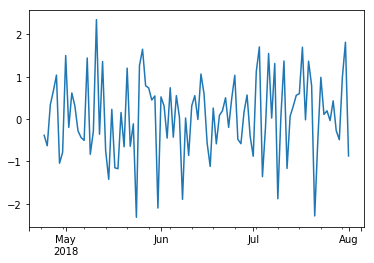

In [31]:
df_time['A'].plot()

## Configuring plots

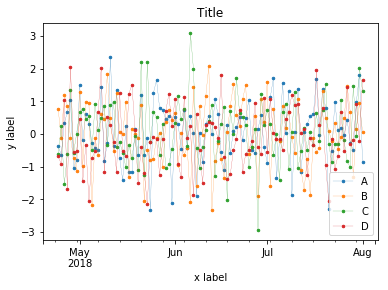

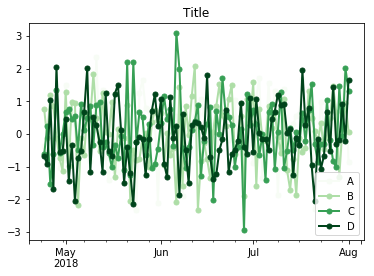

In [69]:
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# df.plot() function returns a matplotlib.axes.AxesSubplot object
ax = df_time.plot(lw=0.2, color=color_map, marker='.', markersize=5, title='Title')
ax.set_xlabel("x label")
ax.set_ylabel("y label")

df_time.plot(lw=2, colormap='Greens', marker='.', markersize=10, title='Title')


# lists of colormaps (note: color vs colormap parameters): 
# https://github.com/vega/vega/wiki/Scales#scale-range-literals
# https://matplotlib.org/examples/color/colormaps_reference.html

# Area Plots

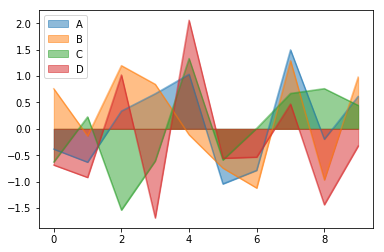

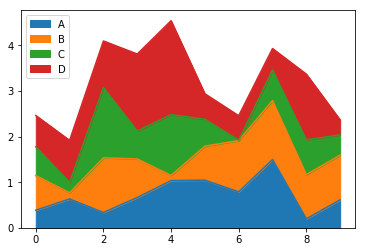

In [205]:
df.iloc[:10].plot.area(stacked=False)

df[list('ABCD')].abs().iloc[:10].plot.area(stacked=True)  # if stacked=True: no negative values allowed

# Scatter Plots

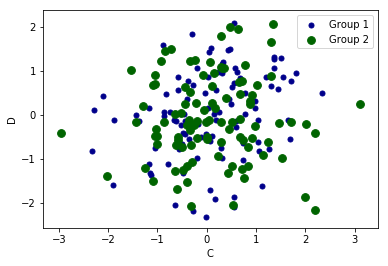

In [223]:
ax = df.plot.scatter(x='A', y='B', color='DarkBlue', label='Group 1', s=25);
df.plot.scatter(x='C', y='D', color='DarkGreen', label='Group 2', ax=ax, s=60);

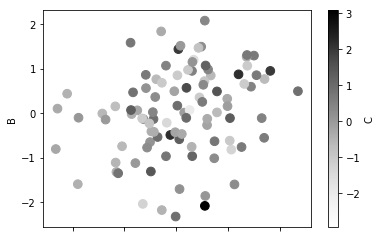

In [224]:
# s controls dot size
# c may be given as the name of a column to provide colors for each point
df.plot.scatter(x='A', y='B', c='C', s=75);

# Bar Plots

### Frequency Plots (for categorical columns)

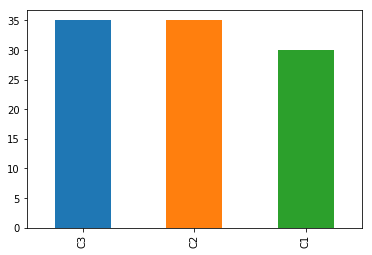

In [256]:
# one category
df['CAT1'].value_counts().plot.bar()

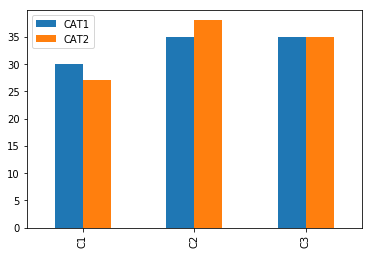

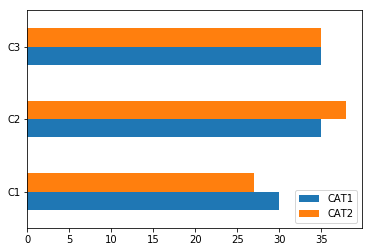

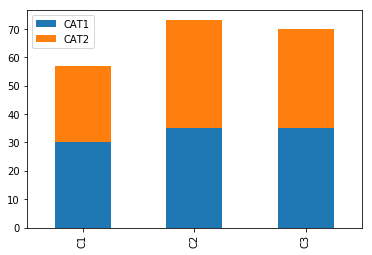

In [261]:
# two or more categories
df_new = df[['CAT1', 'CAT2']].apply(lambda x: x.value_counts())

df_new.plot.bar(stacked=False)
df_new.plot.barh(stacked=False);
df_new.plot.bar(stacked=True)

# Histogram

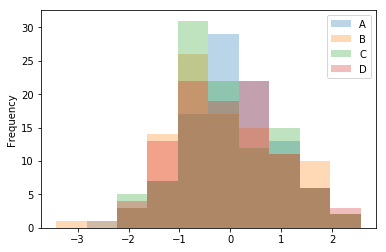

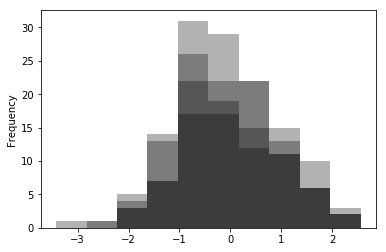

In [287]:
# alpha to configure transparency
df.plot.hist(alpha=0.3)
df.plot.hist(alpha=0.3, color='k', legend=None)

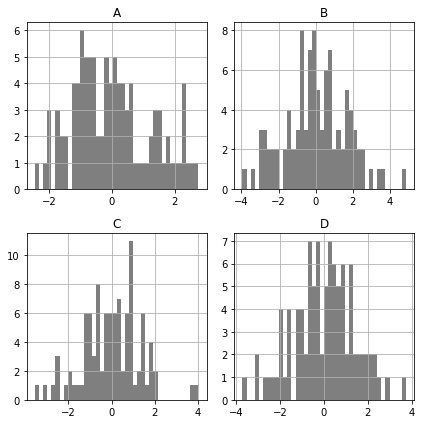

In [300]:
df[list('ABCD')].diff().hist(color='k', alpha=0.5, bins=40, figsize=(6, 6)) # note: diff() might be interesting for time-series
plt.tight_layout() # more space between plots (if not titles and labels overlap)

# Hexagonal Bin Plot

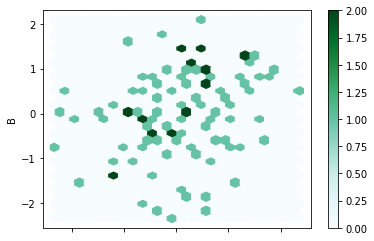

In [202]:
df.plot.hexbin(x='A', y='B', gridsize=25)

# Box Plots 

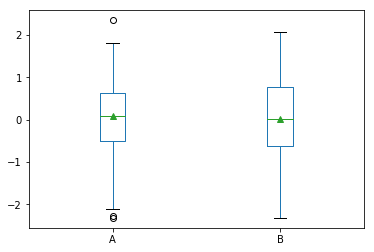

In [225]:
df[['A', 'B']].plot.box(showmeans=True)

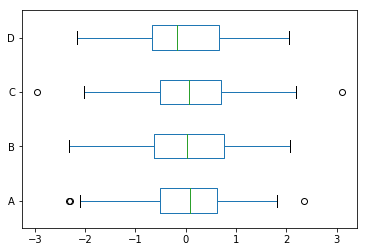

In [229]:
df.plot.box(vert=False)

# Subplots

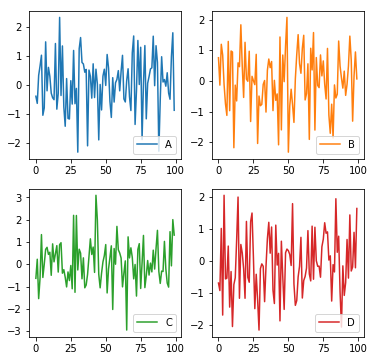

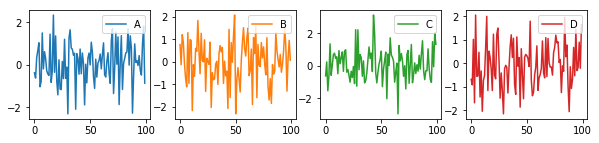

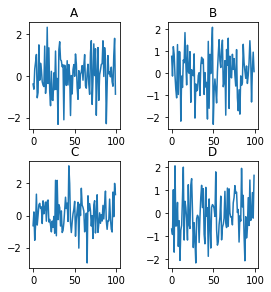

In [203]:
# A 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
ax_targets = [item for sublist in axes for item in sublist] # flatten

axs = df.plot(subplots=True, ax=ax_targets, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=4) for ax in plt.gcf().axes]


# B
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2))
axs = df.plot(subplots=True, ax=axes, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=1) for ax in plt.gcf().axes]

# C
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,4))
plt.tight_layout() # more space between plots (if not titles and labels overlap)
ax_targets = [item for sublist in axes for item in sublist] # flatten

for ax, col_name in zip(ax_targets, df):
    df[col_name].plot(ax=ax)
    ax.set_title(col_name);


In [ ]:
# A 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
ax_targets = [ax for ax in row_axs for row_axs in axes] # flatten

axs = df.plot(subplots=True, ax=ax_targets, legend=True, sharex=False, sharey=False);

print(ax_targets)

# B
fig, axes = plt.subplots(nrows=1, ncols=4)
axs = df.plot(subplots=True, ax=axes, legend=True, sharex=False, sharey=False);

# Using Matplotlib

In some situations it may still be preferable or necessary to prepare plots directly with matplotlib, for instance when a certain type of plot or customization is not (yet) supported by pandas. Series and DataFrame objects behave like arrays and can therefore be passed directly to matplotlib functions without explicit casts.

### Subplots

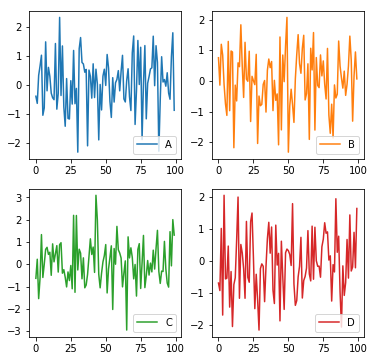

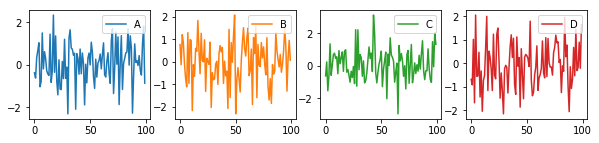

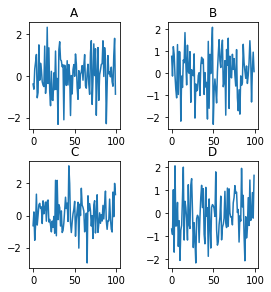

In [193]:
# A 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
ax_targets = [item for sublist in axes for item in sublist] # flatten

axs = df.plot(subplots=True, ax=ax_targets, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=4) for ax in plt.gcf().axes]


# B
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2))
axs = df.plot(subplots=True, ax=axes, legend=True, sharex=False, sharey=False)

# place all legends in the subplots at the same place
[ax.legend(loc=1) for ax in plt.gcf().axes]

# C
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,4))
plt.tight_layout() # more space between plots (if not titles and labels overlap)
ax_targets = [item for sublist in axes for item in sublist] # flatten

for ax, col_name in zip(ax_targets, df):
    df[col_name].plot(ax=ax)
    ax.set_title(col_name);

### Error Band

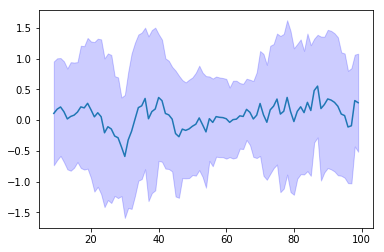

In [95]:
import matplotlib.pyplot as plt

col = df['A']
means = col.rolling(10).mean()
stds = col.rolling(10).std()

plt.plot(means.index, means)
plt.fill_between(stds.index, means - 1 * stds, means + 1 * stds, color='b', alpha=0.2)